In [23]:
from deepface import DeepFace
import pandas as pd
import seaborn as sns
import numpy as np
from pathlib import Path
from shutil import copyfile
from tqdm.notebook import tqdm
import itertools
from tqdm.notebook import tqdm
import numpy as np
import random
import cv2
from typing import Literal

tqdm.pandas()

from sklearn.model_selection import train_test_split


SEED = 254279

np.random.seed(SEED)
random.seed(SEED)

narysuj krzywe FAR,
FRR,
wyznacz EER
narysuj ROC


zmierz PSNR,
SSIM oraz BRISQUE.

In [24]:
identity_df = pd.read_csv("./data/identity_CelebA.txt", sep=" ", header=None, names=["image", "identity"])
identity_df

,image,identity
0,000001.jpg,2880
1,000002.jpg,2937
2,000003.jpg,8692
3,000004.jpg,5805
4,000005.jpg,9295
...,...,...
202594,202595.jpg,9761
202595,202596.jpg,7192
202596,202597.jpg,9852
202597,202598.jpg,5570


<Axes: xlabel='Count', ylabel='identity'>

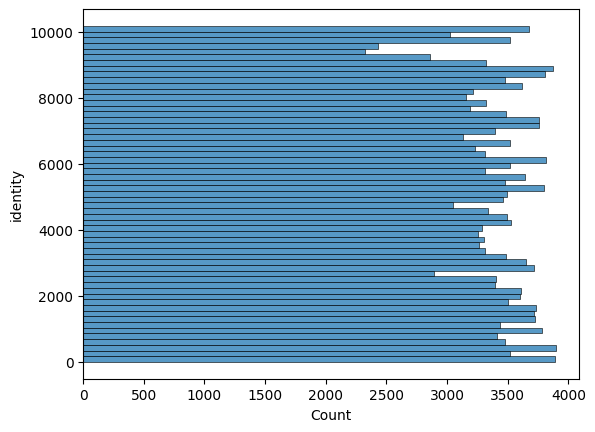

In [25]:
sns.histplot(
    data=identity_df,
    y="identity",
)

In [26]:
random_identities = np.random.choice(identity_df["identity"].unique(), 80)

In [27]:
random_identities

array([ 2159,  8455,   229,  5736,  7803,  7915,  4568,  9535,   902,
        3004,  1004,  2729,  5846,  4754,  1051,  4055,  1295,  2939,
        6129,  4638,  3984, 10053,  3669,  6906,  6069,  5787,   303,
        7450,  1433,  4463,  3670,  5792,  3736,  1567,  7173,   172,
        3716,  5841,  6258,  4544,  1308,   910,   298,  2935, 10038,
        1673,  1337,   612,  1824,   871,  6107,    97,  9625,  5236,
         736,   478,  1663,  4550,  8051,  3742,  4367,  8802,  2339,
          15,  7831,  9273,  9886,  9066,  7804,  8650,  5402,  4896,
        9433,   898,  6074,  6891,  4664,  6997,  5013,  4570])

In [35]:
dataset_df = identity_df[identity_df["identity"].isin(random_identities)]
dataset_df['image'] = dataset_df['image'].str.replace('.jpg', '.png')
dataset_df

,image,identity
9,000010.png,612
27,000028.png,3670
142,000143.png,5787
215,000216.png,4664
360,000361.png,9886
...,...,...
201334,201335.png,6258
201506,201507.png,6074
202085,202086.png,5013
202141,202142.png,5013


In [36]:
IMAGES_DIR = Path("./data/img")
MODEL = "VGG-Face"

In [37]:
# registration_df = dataset_df.groupby("identity").sample(1, random_state=SEED).reset_index(drop=True)
# registration_df.to_csv("./data/registration.csv", index=False)

registration_df = pd.read_csv("./data/registration.csv")

registration_df

,image,identity
0,050987.png,15
1,180629.png,97
2,108845.png,172
3,163175.png,229
4,165766.png,298
...,...,...
75,022376.png,9535
76,061873.png,9625
77,053384.png,9886
78,129996.png,10038


In [38]:
from users_db import UsersDB

In [39]:
db = UsersDB(model=MODEL)

In [40]:
for index, row in registration_df.iterrows():
    img_fpath = IMAGES_DIR / row["image"]
    db.add_record(row["identity"], img_fpath)

In [41]:
df_wthout_registration = dataset_df[~dataset_df["image"].isin(registration_df["image"])]
df_wthout_registration["truth"] = True
df_wthout_registration

,image,identity,truth
9,000010.png,612,True
27,000028.png,3670,True
142,000143.png,5787,True
215,000216.png,4664,True
360,000361.png,9886,True
...,...,...,...
201334,201335.png,6258,True
201506,201507.png,6074,True
202085,202086.png,5013,True
202141,202142.png,5013,True


In [43]:
n = 673

fake_identities = df_wthout_registration[:n].copy()

identities_2half = df_wthout_registration[n:2*n]["identity"].tolist()
random.shuffle(identities_2half)

fake_identities["fake_identity"] = identities_2half
fake_identities["truth"] = fake_identities["fake_identity"] == fake_identities["identity"]
fake_identities = fake_identities[fake_identities["truth"] == False].copy()

fake_identities.to_csv("./data/fake_identities.csv", index=False)

fake_identities = pd.read_csv("./data/fake_identities.csv")

fake_identities

,image,identity,truth,fake_identity
0,000010.png,612,False,7173
1,000028.png,3670,False,1567
2,000216.png,4664,False,5792
3,000361.png,9886,False,4367
4,000493.png,5236,False,871
...,...,...,...,...
660,099369.png,9625,False,5787
661,099473.png,910,False,4055
662,099497.png,3742,False,1051
663,099640.png,898,False,1308


In [44]:
fake_identities.truth.sum()

0

In [45]:
df1 = fake_identities.drop(columns=["identity"]).rename(columns={"fake_identity": "identity"})
df1 = pd.concat([
    df1,
    df_wthout_registration[n:2*n]
])
df1.to_csv("./data/df1.csv", index=False)
df1

,image,truth,identity
0,000010.png,False,7173
1,000028.png,False,1567
2,000216.png,False,5792
3,000361.png,False,4367
4,000493.png,False,871
...,...,...,...
201334,201335.png,True,6258
201506,201507.png,True,6074
202085,202086.png,True,5013
202141,202142.png,True,5013


In [46]:
registered_identities = registration_df["identity"].tolist()

new_users_df = identity_df[~identity_df["identity"].isin(registered_identities)].sample(100, random_state=SEED)

new_fake_id_list = df1.sample(100, random_state=SEED)["identity"].tolist()

new_users_df["identity"] = new_fake_id_list
new_users_df["truth"] = False

new_users_df.to_csv("./data/new_users.csv", index=False)

new_users_df = pd.read_csv("./data/new_users.csv")

new_users_df

,image,identity,truth
0,112819.jpg,3670,False
1,114190.jpg,4570,False
2,030710.jpg,1824,False
3,002204.jpg,5846,False
4,107559.jpg,303,False
...,...,...,...
95,000251.jpg,4568,False
96,199773.jpg,5236,False
97,176142.jpg,6074,False
98,196518.jpg,9886,False


In [47]:
df2 = pd.concat([df1, new_users_df])
df2.to_csv("./data/df2.csv", index=False)
df2

,image,truth,identity
0,000010.png,False,7173
1,000028.png,False,1567
2,000216.png,False,5792
3,000361.png,False,4367
4,000493.png,False,871
...,...,...,...
95,000251.jpg,False,4568
96,199773.jpg,False,5236
97,176142.jpg,False,6074
98,196518.jpg,False,9886


In [48]:
df3 = pd.concat([
    df1[:150].copy(),
    df1[-150:].copy(),
])

df3.to_csv("./data/df3.csv", index=False)
df3 = pd.read_csv("./data/df3.csv")

df3

,image,truth,identity
0,000010.png,False,7173
1,000028.png,False,1567
2,000216.png,False,5792
3,000361.png,False,4367
4,000493.png,False,871
...,...,...,...
295,201335.png,True,6258
296,201507.png,True,6074
297,202086.png,True,5013
298,202142.png,True,5013


In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def calculate_sigma(psnr, max_i=255):
    """
    Calculate the standard deviation of the Gaussian noise to achieve a given PSNR.
    
    :param psnr: Desired PSNR level in dB.
    :param max_i: Maximum possible pixel value of the image.
    :return: Standard deviation of the Gaussian noise.
    """
    mse = max_i**2 / (10**(psnr / 10))
    sigma = np.sqrt(mse)
    return sigma

def add_gaussian_noise(image, sigma):
    """
    Add Gaussian noise to an image with a specified standard deviation.
    
    :param image: Original image.
    :param sigma: Standard deviation of the Gaussian noise.
    :return: Noisy image.
    """
    gauss = np.random.normal(0, sigma, image.shape)
    noisy_image = image + gauss
    noisy_image = np.clip(noisy_image, 0, 255)  # Clip the values to maintain valid pixel range
    return noisy_image.astype(np.uint8)


PSNR_VALUES = [70, 45, 35, 25, 15]
for psnr in tqdm(PSNR_VALUES):
    for img_name in df3["image"]:
        image = cv2.imread(str(IMAGES_DIR / img_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        noisy_image = add_gaussian_noise(image, calculate_sigma(psnr))
        noisy_img_fpath = Path(f"./data/df3_psnr{psnr}db/{img_name}")
        noisy_img_fpath.parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(str(noisy_img_fpath), cv2.cvtColor(noisy_image, cv2.COLOR_RGB2BGR))


  0%|          | 0/5 [00:00<?, ?it/s]

In [45]:
def scale_luminance(image, fashion: Literal["quad", "linear", "constant"], linear_factor=None, constant=None):
    # Convert image to float for computations
    image_float = image.astype(np.float32)

    # Convert RGB to YUV to manipulate luminance
    image_yuv = cv2.cvtColor(image_float, cv2.COLOR_RGB2YUV)

    if fashion == "quad":
        # Scale the Y channel (luminance) quadratically
        image_yuv[:, :, 0] = (image_yuv[:, :, 0] ** 2) / 255
    elif fashion == "linear" and linear_factor is not None:
        # Scale the Y channel (luminance) linearly
        image_yuv[:, :, 0] = image_yuv[:, :, 0] * linear_factor
    elif fashion == "constant" and constant is not None:
        # Adjust the Y channel (luminance) by adding the constant
        image_yuv[:, :, 0] = image_yuv[:, :, 0] + constant

    # Clip the values to maintain valid pixel range
    image_yuv[:, :, 0] = np.clip(image_yuv[:, :, 0], 0, 255)

    # Convert back to RGB
    image_rgb_scaled = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

    # Return scaled image in original data type
    return image_rgb_scaled.astype(image.dtype)


df4 = df3.copy()
df4.to_csv("./data/df4.csv", index=False)
df4 = pd.read_csv("./data/df4.csv")

for img_name in tqdm(df4["image"], desc="Scaling luminance quadratically"):
    image = cv2.imread(str(IMAGES_DIR / img_name))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    lum_quad_image = scale_luminance(image, fashion="quad")
    lum_quad_image_fpath = Path(f"./data/df4_luminance_quad/{img_name}")
    lum_quad_image_fpath.parent.mkdir(exist_ok=True, parents=True)
    cv2.imwrite(str(lum_quad_image_fpath), cv2.cvtColor(lum_quad_image, cv2.COLOR_RGB2BGR))

Scaling luminance quadratically:   0%|          | 0/300 [00:00<?, ?it/s]

In [50]:
LUM_LINEAR_FACTOR_VALUES = [1/2, 3/5, 3/4, 4/3, 3/2]
for factor in tqdm(LUM_LINEAR_FACTOR_VALUES, desc="Scaling luminance linearly"):
    for img_name in tqdm(df4["image"], desc=f"factor={factor}", leave=False, position=1):
        image = cv2.imread(str(IMAGES_DIR / img_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        lum_linear_image = scale_luminance(image, fashion="linear", linear_factor=factor)
        factor_str_safe = str(round(factor, 2)).replace(".", "f")
        lum_linear_image_fpath = Path(f"./data/df4_luminance_linear_{factor_str_safe}/{img_name}")
        lum_linear_image_fpath.parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(str(lum_linear_image_fpath), cv2.cvtColor(lum_linear_image, cv2.COLOR_RGB2BGR))

Scaling luminance linearly:   0%|          | 0/5 [00:00<?, ?it/s]

factor=0.5:   0%|          | 0/300 [00:00<?, ?it/s]

factor=0.6:   0%|          | 0/300 [00:00<?, ?it/s]

factor=0.75:   0%|          | 0/300 [00:00<?, ?it/s]

factor=1.3333333333333333:   0%|          | 0/300 [00:00<?, ?it/s]

factor=1.5:   0%|          | 0/300 [00:00<?, ?it/s]

In [51]:
LUM_CONSTANT_VALUES = [-100, -20, -10, 30]
for constant in tqdm(LUM_CONSTANT_VALUES, desc="Scaling luminance by constant"):
    for img_name in tqdm(df4["image"], desc=f"constant={constant}", leave=False, position=1):
        image = cv2.imread(str(IMAGES_DIR / img_name))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        lum_const_image = scale_luminance(image, fashion="constant", constant=constant)
        const_str_safe = str(constant).replace("-", "neg")
        lum_const_image_fpath = Path(f"./data/df4_luminance_const_{const_str_safe}/{img_name}")
        lum_const_image_fpath.parent.mkdir(exist_ok=True, parents=True)
        cv2.imwrite(str(lum_const_image_fpath), cv2.cvtColor(lum_const_image, cv2.COLOR_RGB2BGR))

Scaling luminance by constant:   0%|          | 0/4 [00:00<?, ?it/s]

constant=-100:   0%|          | 0/300 [00:00<?, ?it/s]

constant=-20:   0%|          | 0/300 [00:00<?, ?it/s]

constant=-10:   0%|          | 0/300 [00:00<?, ?it/s]

constant=30:   0%|          | 0/300 [00:00<?, ?it/s]